Solution x(t) : [t*exp(-t)*Heaviside(t) + exp(-t)*Heaviside(t) - exp(-2*t)*Heaviside(t), exp(-2*t)*Heaviside(t)]
Sortie y(t) : t*exp(-t)*Heaviside(t) + exp(-t)*Heaviside(t)


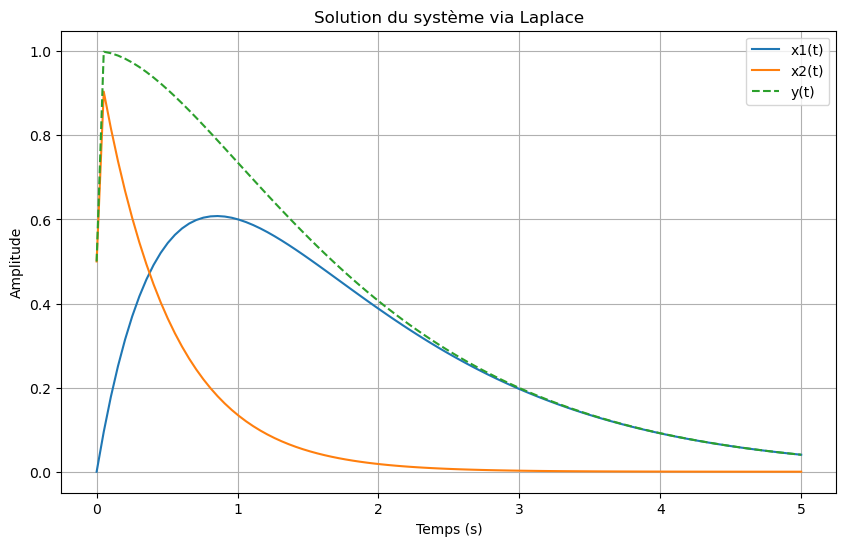

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Définir les variables symboliques
s, t = sp.symbols('s t')
A = sp.Matrix([[-1, 1], [0, -2]])
B = sp.Matrix([[1], [0]])
C = sp.Matrix([[1, 1]])
x0 = sp.Matrix([[0], [1]])
u = 1 / (s + 1)  # Transformée de Laplace de u(t) = e^(-t)

# Calculer (sI - A)^(-1)
I = sp.eye(2)
sI_minus_A = s * I - A
sI_minus_A_inv = sI_minus_A.inv()

# Calculer X(s)
X_s = sI_minus_A_inv * (x0 + B * u)

# Transformée inverse pour x(t)
x_t = [sp.inverse_laplace_transform(X_s[i, 0], s, t) for i in range(2)]

# Calculer y(t)
y_t = C * sp.Matrix(x_t)

# Afficher les résultats
print("Solution x(t) :", x_t)
print("Sortie y(t) :", y_t[0])

# Évaluation numérique pour le tracé
t_vals = np.linspace(0, 5, 100)
x1_vals = [x_t[0].subs(t, ti).evalf() for ti in t_vals]
x2_vals = [x_t[1].subs(t, ti).evalf() for ti in t_vals]
y_vals = [y_t[0].subs(t, ti).evalf() for ti in t_vals]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x1_vals, label='x1(t)')
plt.plot(t_vals, x2_vals, label='x2(t)')
plt.plot(t_vals, y_vals, label='y(t)', linestyle='--')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Solution du système via Laplace')
plt.legend()
plt.grid()
plt.show()

Solution x(t) : Matrix([[t*exp(-t) + (exp(t) - 1)*exp(-2*t)], [-2*(exp(t) - 1)*exp(-2*t) + (2*exp(t) - 1)*exp(-2*t)]])
Sortie y(t) : t*exp(-t) - (exp(t) - 1)*exp(-2*t) + (2*exp(t) - 1)*exp(-2*t)


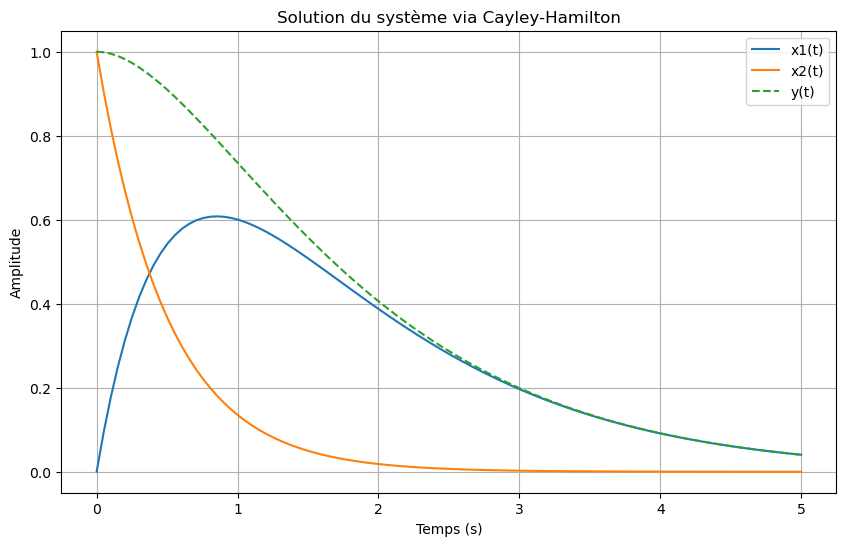

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Définir les variables symboliques
t, tau = sp.symbols('t tau')
A = sp.Matrix([[-1, 1], [0, -2]])
B = sp.Matrix([[1], [0]])
C = sp.Matrix([[1, 1]])
x0 = sp.Matrix([[0], [1]])

# Calculer e^{At} via Cayley-Hamilton
# Valeurs propres : -1, -2
alpha_0 = sp.symbols('alpha_0')
alpha_1 = sp.symbols('alpha_1')
eq1 = alpha_0 - alpha_1 - sp.exp(-t)
eq2 = alpha_0 - 2 * alpha_1 - sp.exp(-2 * t)
sol = sp.solve([eq1, eq2], (alpha_0, alpha_1))
alpha_0_t = sol[alpha_0]
alpha_1_t = sol[alpha_1]

# Matrice exponentielle
e_At = alpha_0_t * sp.eye(2) + alpha_1_t * A

# Solution homogène
x_h = e_At * x0

# Solution particulière (intégrale de convolution pour u(t) = e^(-t))
integrand = e_At.subs(t, t - tau) * B * sp.exp(-tau)
x_p = sp.integrate(integrand, (tau, 0, t))

# Solution totale
x_t = x_h + x_p

# Sortie
y_t = C * x_t

# Afficher les résultats
print("Solution x(t) :", x_t)
print("Sortie y(t) :", y_t[0])

# Évaluation numérique pour le tracé
t_vals = np.linspace(0, 5, 100)
x1_vals = [x_t[0].subs(t, ti).evalf() for ti in t_vals]
x2_vals = [x_t[1].subs(t, ti).evalf() for ti in t_vals]
y_vals = [y_t[0].subs(t, ti).evalf() for ti in t_vals]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x1_vals, label='x1(t)')
plt.plot(t_vals, x2_vals, label='x2(t)')
plt.plot(t_vals, y_vals, label='y(t)', linestyle='--')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Solution du système via Cayley-Hamilton')
plt.legend()
plt.grid()
plt.show()

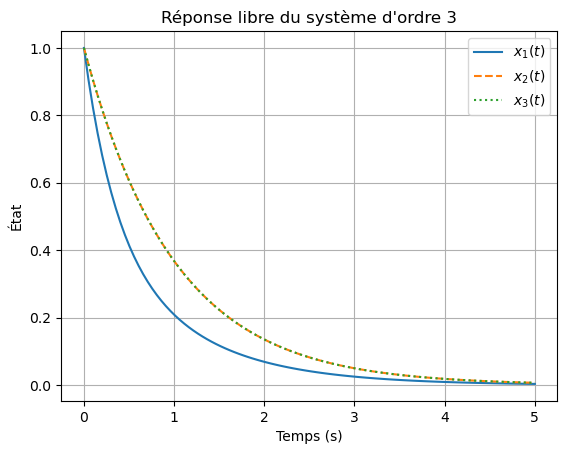

In [9]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 5, 100)
x1 = 0.5*np.exp(-t) + 0.5*np.exp(-3*t)
x2 = np.exp(-t)
x3 = np.exp(-t)
plt.plot(t, x1, label='$x_1(t)$')
plt.plot(t, x2, '--', label='$x_2(t)$')
plt.plot(t, x3, ':', label='$x_3(t)$')
plt.xlabel('Temps (s)'); plt.ylabel('État'); plt.legend()
plt.title('Réponse libre du système d\'ordre 3')
plt.grid()
plt.show()